In [1]:
import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt

train_data_dir = "train"
validation_data_dir = "val"
img_width, img_height = 224, 224
model_name = 'model.h5'

model = keras.models.load_model(model_name)
model.summary()

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Found 9157 images belonging to 2 classes.


array([[0.6594847 ],
       [0.05251496],
       [0.28107667],
       [0.03413803],
       [0.05819736],
       [0.1797012 ],
       [0.5214308 ],
       [0.00756827]], dtype=float32)

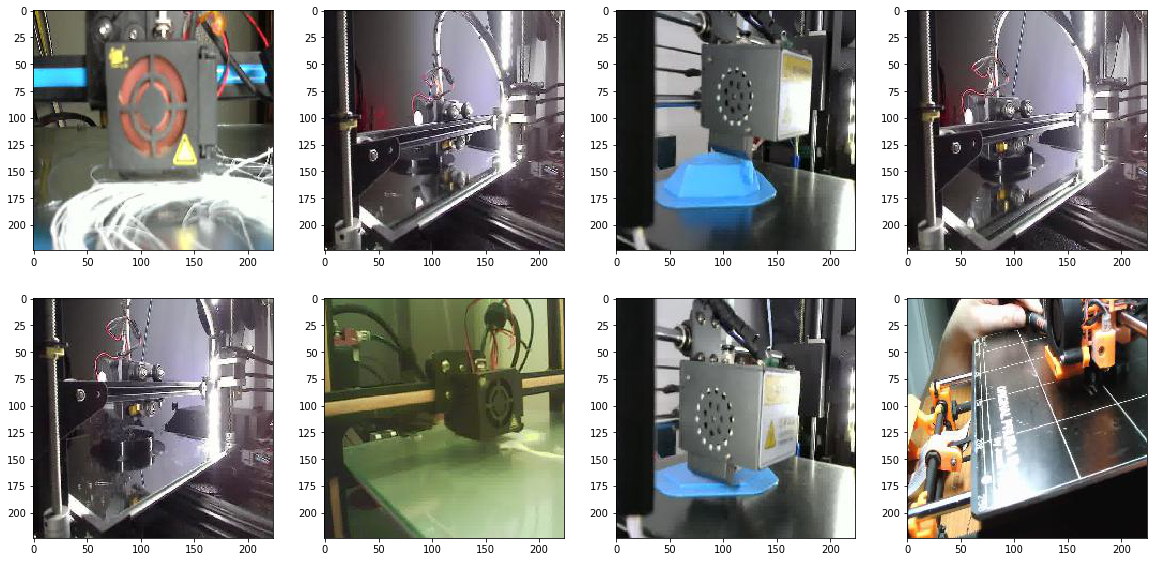

In [18]:
test_datagen = ImageDataGenerator(
rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = 8,
class_mode = "categorical")

imgs = validation_generator.next()[0]

plt.figure(figsize=(20,15))
columns = 4
for i in range(len(imgs)):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(imgs[i])
    
model.predict(imgs)

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="float64" )/255.0
    return data

In [9]:
import numpy as np
good_x = np.full((100, 224, 224, 3), 0, dtype='float32')
good_x[:,:,:,1] = 0.5
bad_x = np.full((100, 224, 224, 3), 0, dtype='float32')
bad_x[:,:,:,0] = 0.5
good_y = np.asarray([1]*len(good_x), dtype="float32")
bad_y = np.asarray([0]*len(bad_x), dtype="float32")
x = np.concatenate((good_x, bad_x), axis=0)
y = np.concatenate((good_y, bad_y), axis=0)
model.evaluate(x,y, verbose=1) 

ResourceExhaustedError: OOM when allocating tensor with shape[32,112,112,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv1/conv_2/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](zero_padding2d_1_2/Pad, conv1/conv_2/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics_2/acc/Mean_1/_14203 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5759_metrics_2/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv1/conv_2/convolution', defined at:
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-a471a2234f05>", line 16, in <module>
    model = keras.models.load_model(model_name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/models.py", line 243, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/models.py", line 317, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/utils/generic_utils.py", line 144, in deserialize_keras_object
    list(custom_objects.items())))
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/topology.py", line 2520, in from_config
    process_node(layer, node_data)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/topology.py", line 2477, in process_node
    layer(input_tensors[0], **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/convolutional.py", line 168, in call
    dilation_rate=self.dilation_rate)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 3332, in conv2d
    data_format=tf_data_format)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 781, in convolution
    return op(input, filter)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 869, in __call__
    return self.conv_op(inp, filter)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 521, in __call__
    return self.call(inp, filter)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 205, in __call__
    name=self.name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[32,112,112,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv1/conv_2/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](zero_padding2d_1_2/Pad, conv1/conv_2/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics_2/acc/Mean_1/_14203 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5759_metrics_2/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [4]:
import glob
jpgs = glob.glob('val/worst/*.jpg')
imgs = np.asarray(list(map(load_image, jpgs[:2000])))
# model.evaluate(imgs, np.asarray([1]*len(imgs), dtype="float32"), verbose=1) 
pr = model.predict(imgs)

In [7]:
import glob
jpgs = glob.glob('val/bad/*.jpg')
imgs = np.asarray(list(map(load_image, jpgs[0:200])))
model.evaluate(imgs, np.asarray([[0,1]]*200), verbose=1) 
# model.predict(imgs)

200/200 [==============================] - 0s 2ms/step


[0.5147256851196289, 1.0]

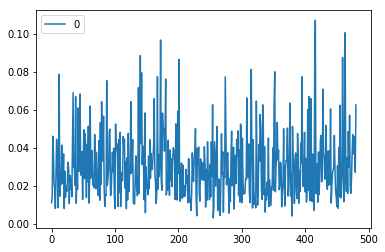

In [22]:
import matplotlib.image as mpimg
import glob

prefix = '529557335'
folder = 'train/best/'

plt.figure(figsize=(20,20))
columns = 16

jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds[:,1]))
df.plot()
# for i, img_path in enumerate(jpgs):
#     plt.subplot(len(jpgs) / columns + 1, columns, i + 1)
#     plt.imshow(mpimg.imread(img_path))

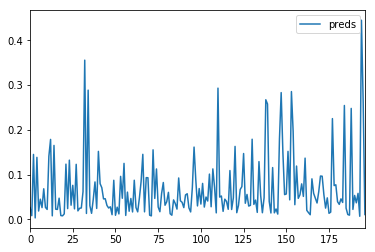

In [29]:
folder = 'train/worst/'
jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds_bad = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds_bad[:,1]))
df.plot()

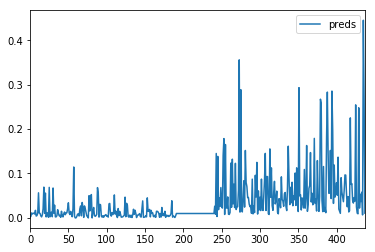

In [30]:
newpred = np.concatenate((preds, np.full((50,2), 0.01), preds_bad), axis=0)
df = pd.DataFrame(dict(preds=newpred[:,1]))
df.plot()

In [13]:
preds[:,0]

array([0.06111903, 0.03218681, 0.02121914, 0.04261411, 0.06820815,
       0.03339196, 0.03484371, 0.04056826, 0.00948919, 0.05816441,
       0.13666026, 0.0308034 , 0.01729063, 0.03393209, 0.04309264,
       0.01398597, 0.03784347, 0.05274166, 0.01338446, 0.02733873,
       0.06645267, 0.01322113, 0.0572769 , 0.02208459, 0.03927185,
       0.01820723, 0.00846714, 0.0697064 , 0.22612856, 0.01301195,
       0.03117429, 0.07951083, 0.01152136, 0.01486873, 0.135672  ,
       0.03787171, 0.04395951, 0.02583145, 0.02802233, 0.00548517,
       0.0332602 , 0.03252502, 0.07195741, 0.01097418, 0.09699269,
       0.03472002, 0.04348875, 0.01485936, 0.06052475, 0.01524342,
       0.07095495, 0.13589208, 0.02394883, 0.02836438, 0.20286769,
       0.01807558, 0.02599523, 0.06638308, 0.01334612, 0.03302897,
       0.1886349 , 0.12560879, 0.01625726, 0.01209345, 0.04582235,
       0.01196312, 0.02418127, 0.06066647, 0.02520865, 0.02379129,
       0.02976324, 0.0084486 , 0.02038544, 0.0239451 , 0.02892